In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [5]:
import sys
!{sys.executable} -m pip install seaborn

In [6]:
import seaborn as sns

In [7]:
df = sns.load_dataset("tips")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df.isnull().values.any()

False

In [11]:
df[df.isnull().any(axis=1)]

,total_bill,tip,sex,smoker,day,time,size


In [14]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
bat = df.groupby(['day', 'sex'])[['total_bill', 'tip']].agg('mean')
bat

C:\Users\Dawid\AppData\Local\Temp\ipykernel_15876\815908525.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bat = df.groupby(['day', 'sex'])[['total_bill', 'tip']].agg('mean')


total_bill       tip
day  sex                         
Thur Male     18.714667  2.980333
     Female   16.715312  2.575625
Fri  Male     19.857000  2.693000
     Female   14.145556  2.781111
Sat  Male     20.802542  3.083898
     Female   19.680357  2.801786
Sun  Male     21.887241  3.220345
     Female   19.872222  3.367222

In [31]:
bat.reset_index()

,day,sex,total_bill,tip
0,Thur,Male,18.714667,2.980333
1,Thur,Female,16.715312,2.575625
2,Fri,Male,19.857000,2.693000
3,Fri,Female,14.145556,2.781111
4,Sat,Male,20.802542,3.083898
5,Sat,Female,19.680357,2.801786
6,Sun,Male,21.887241,3.220345
7,Sun,Female,19.872222,3.367222


In [35]:
df['tip_rate'] = (df['tip'] / df['total_bill']) * 100
tip_rate

0      16.821782
1       6.228916
2       6.002857
3       7.154079
4       6.811634
         ...    
239     4.903716
240    13.590000
241    11.335000
242    10.182857
243     6.260000
Length: 244, dtype: float64

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [53]:
tip_summary = df.groupby(['day', 'sex', 'time'], observed=True)['tip_rate'].mean().reset_index()
tip_summary

,day,sex,time,tip_rate
0,Thur,Male,Lunch,16.527649
1,Thur,Female,Lunch,15.745323
2,Thur,Female,Dinner,15.974441
3,Fri,Male,Lunch,17.414400
4,Fri,Male,Dinner,13.020284
5,Fri,Female,Lunch,19.973055
6,Fri,Female,Dinner,19.911468
7,Sat,Male,Dinner,15.157684
8,Sat,Female,Dinner,15.647021
9,Sun,Male,Dinner,16.234407


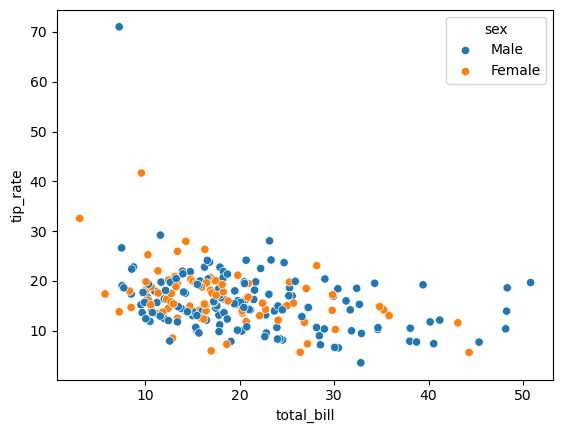

In [55]:
sns.scatterplot(data=df, x = 'total_bill', y = 'tip_rate', hue='sex')
plt.show()

In [72]:
df.nlargest(10,['tip_rate'])

,total_bill,tip,sex,smoker,day,time,size,tip_rate,is_weekend,day_type
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483,True,Weekend
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667,True,Weekend
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290,True,Weekend
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966,True,Weekend
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517,True,Weekend
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481,True,Weekend
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158,False,Weekday
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039,False,Weekday
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.931446,False,Weekday
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250,True,Weekend


Odpowiedz w Markdown:

Czy poziom napiwków różni się istotnie w weekendy?

Która grupa klientów zostawia wyższe napiwki w procentach?

In [57]:
df['is_weekend'] = df['day'].isin(['Sat', 'Sun'])

In [58]:
df['day_type'] = df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

In [74]:
tip_rate_comparision = df.groupby(['day_type', 'sex'], observed=True)['tip_rate'].mean().reset_index()
tip_rate_comparision.sort_values(by='tip_rate', ascending=False).round(2)

,day_type,sex,tip_rate
1,Weekday,Female,16.67
3,Weekend,Female,16.63
0,Weekday,Male,15.98
2,Weekend,Male,15.69


In [73]:
tip_comparision = df.groupby(['day_type', 'sex'], observed=True)['tip'].mean().reset_index()
tip_comparision.sort_values(by='tip', ascending=False).round(2)

,day_type,sex,tip
2,Weekend,Male,3.15
3,Weekend,Female,3.02
0,Weekday,Male,2.91
1,Weekday,Female,2.62


Różnica w poziomie napiwków w weekendy i dni powszednie jest minimalna i nie wygląda na istotną
Według tabeli tip_rate_comparision można stwierdzić, że procentowo, to kobiety zostawiają większe napiwki